In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
import pandas as pd

##Carregando os dados
dados = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(dados)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
#renomeando as colunas de dados
renomear = {
    "mileage_per_year" : "milhas_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}

dados = dados.rename(columns = renomear)

#mudando yes/no para 1/0
renomear_vendidos = {
    "yes" : 1,
    "no" : 0
}

dados.vendido = dados.vendido.map(renomear_vendidos)

dados.head()

,Unnamed: 0,milhas_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import date

#criando nova coluna com a idade do carro.
data_atual = date.today()

dados["idade_do_modelo"] = data_atual.year - dados.ano_do_modelo

#criando nova coluna Km_por_ano
milhas_p_km = 1.6

dados["km_por_ano"] = (dados.milhas_ano	* milhas_p_km)

#removendo colunas que não iremos utilizar
dados = dados.drop(columns = ["Unnamed: 0", 'milhas_ano', 'ano_do_modelo'], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,34881.6
1,40557.96,1,25,12548.8
2,89627.50,0,17,11374.4
3,95276.14,0,8,42916.8
4,117384.68,1,9,12696.0


In [ ]:
#Neste bloco realizamos a analize utilizando o svc, onde obtemos uma acuracia

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#dados que iremos analizar
x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

#padronizando o Seed, (para não recebermos resultados diferentes)
SEED = 5
np.random.seed(SEED)

#separando recursos de treino e de teste em 0.25
#stratify serve para fazer uma proporção entre o y, que seriam as vendas
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#treinando nosso algoritmo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

#testando a accuracia dele
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.04%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#porem como saber se essa analize é boa?
#Vamos realizar uma outra analize utilizando o Dummy que seria uma forma de
#analize "boba" onde todos os resultados resultariam em vendido por exemplo

from sklearn.dummy import DummyClassifier

#aqui realizamos o teste utilizando o dummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


In [ ]:
#o teste Dummy possui varias formas de classificar
#iremos utilizar o mostFrequent e o Stratify para fazer alguns testes...

from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy = "most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [ ]:
#Verificamos então os casos atuais e podemos utilizar outra forma de verificação
#Para podermos buscar uma acurácia maior.
#iremos utilizar o SVM para treinar a maquina e iremos tambem realizar o
#escalonamento dos dados para não terem uma diferença tão grande

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#separação dos dados para treino e para teste
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Aqui estamos escalando o projeto para os que os dados fiquem aproximados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#finalmente estamos fazendo os testes
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)



Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
#neste bloco utilizamos então o TreeClassifier que ira funcionar para verificarmos
#como esta funcionando o algoritmo de decisão do nosso codigo.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#max_depth é a quantidade de parametros que serão passados
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


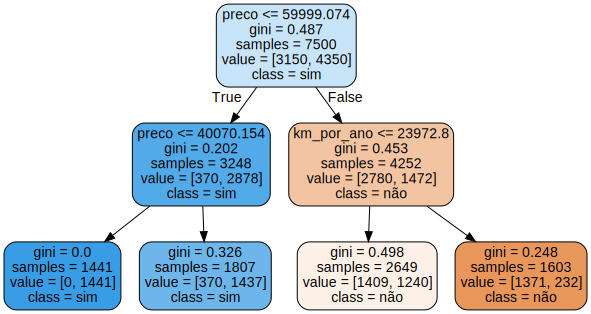

In [ ]:
#Nesse bloco então finalmente vemos como funciona a nossa arvore de decisões...
#Alguns pontos importantes são os Samples(a quantidade de casos que se enquadram na condição)
#linha inicial verifica a condição
#Class (se sera ou não vendido)

from sklearn.tree import export_graphviz
import graphviz

features = x.columns

#as informações dessas linhas são a configuração do nosso grafico
#tanto imagem quanto os conteudos.
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico